# ÚKOL 2

## Zadání:
Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic. K obrázkou jsou k dispozici i labels, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu scikitlearn, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné data. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné y.

In [206]:
# Import knihoven
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score
from sklearn.svm import LinearSVC, SVC

In [207]:
digits = datasets.load_digits()
y = digits.target
data = digits.images

Níže je obrázek, který je touto maticí reprezentován. Asi bychom ho odhadli jako 0, což je i správná odpověď.
Obrázek byl vytvořen pomocí modulu matplotlib a funkce imshow, která vykreslí číselnou matici jako obrázek. Pokud vybereme obrázek na pozici 0 a nastavíme černobílé barevné schéma (cmap=plt.cm.gray_r), získáme obrázek, který byl výše.

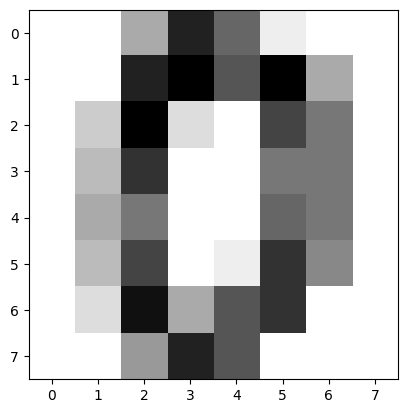

In [208]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

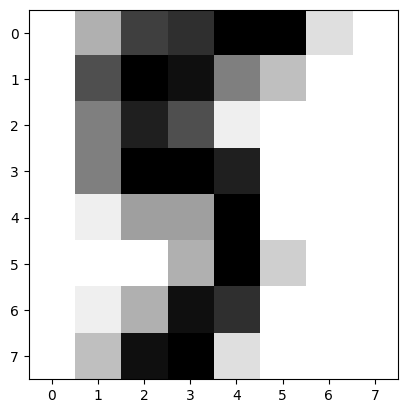

In [209]:
# Zobrazení obrázku na pozici 15
plt.imshow(data[15], cmap=plt.cm.gray_r)

In [210]:
# Správnou odpověď najdeme v poli y též na pozici 0 a 15.
print(f"pozice  0 => y = {y[0]}")
print(f"pozice 15 => y = {y[0]}")

pozice  0 => y = 0
pozice 15 => y = 0


Poslední krok je často označován převod dat na flat, tj. na plochá data. Nyní je totiž každé číslo reprezentováno dvourozměrnou maticí 8x8, ale pro použití algoritmu SVC potřebujeme, aby bylo každé číslo reprezentováno jednorozměrně. Můžeš si to představit tak, že chceme, aby každé číslo bylo reprezentováno jedním řádkem v tabulce, která má 64 sloupců.

Můžeme si to ukázat na číslu, které jsme si prohlíželi. Níže je číslo převedené do jednorozměrné formy. Když si čísla porovnáš s předchozím zápisem formou matice, uvidíš stejná čísla, ale pouze jeden pár hranatých závorek. To značí, že jde o jednorozměrné pole, tj. všechna čísla jsou v jednom řádku.

Tento převod byl proveden pomocí metody reshape(-1), které jsme dali parametr -1, což vede k tomu, že výsledkem je jednorozměrné pole.

In [211]:
data[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

My ale potřebujeme převést všechna čísla, to uděláme příkazem níže. Hodnotou na nulté pozici seznamu říkáme, kolik máme v našem souboru pozorování, takže metoda reshape() vytvoří samostatný řádek každému z čísel.

In [212]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

Napiš kód, kterým vytvoříš model, který bude klasifikovat obrázek do správné skupiny.

Rozděl data na testovací a trénovací pomocí metody train_test_split, přičemž nastav parametry test_size=0.3 a random_state=42. Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. X_train, X_test, y_train, y_test.

Trénovací a testovací množina

In [213]:
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Klasifikátor SVC (kernel="linear"), matice záměn

Accuracy = 0.9796296296296296


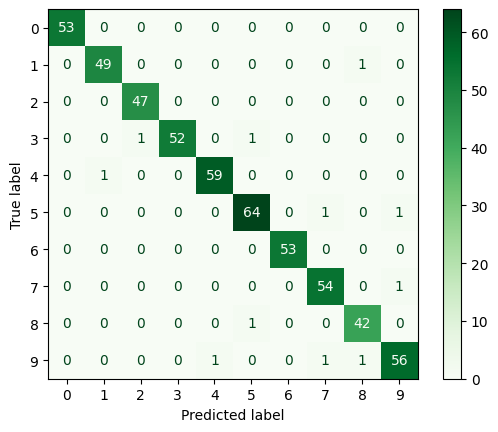

In [214]:
# Klasifikátor, decision_function_shape - defaultně "ovo"
clf = SVC(kernel="linear", random_state=42) 

# Natrénuj model s využitím metody fit() a nakonec metodou predict() 
# vytvoř pole predikcí pro testovací data, které pojmenuj y_pred
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Hodnota accuracy
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")

# Matice záměn
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Greens) # matice záměn

# Bonus

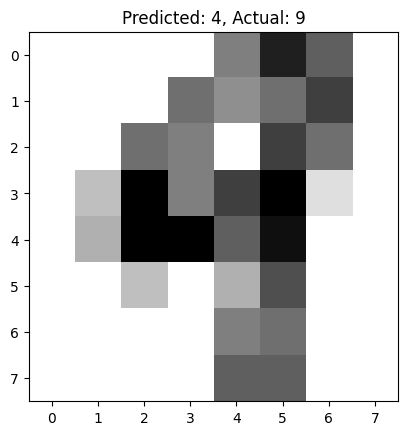

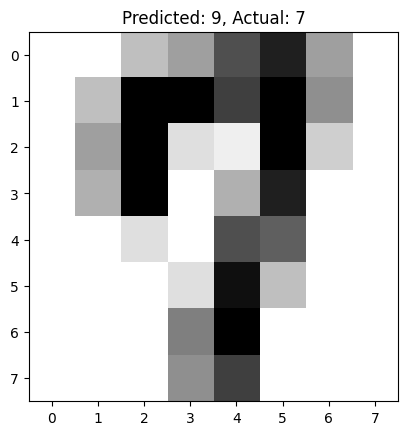

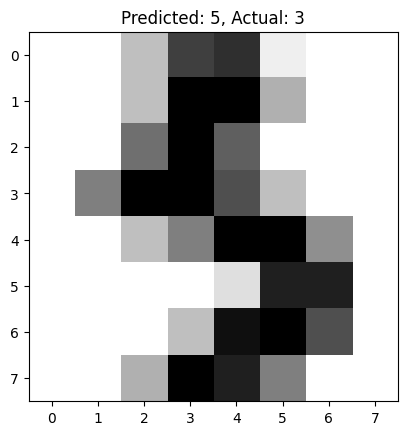

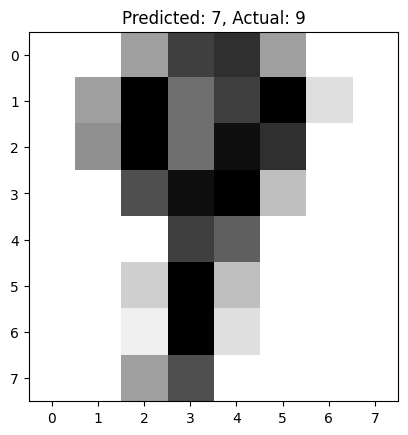

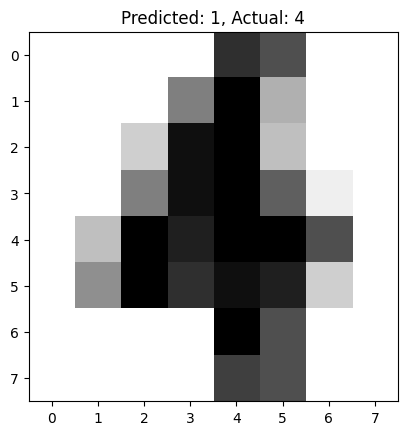

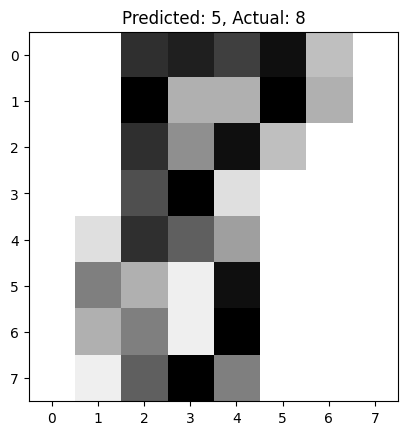

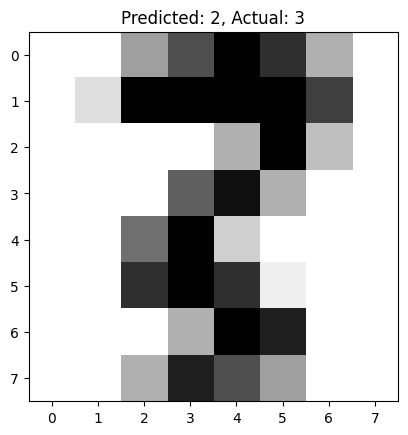

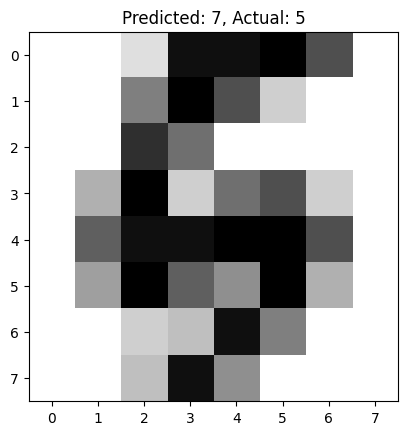

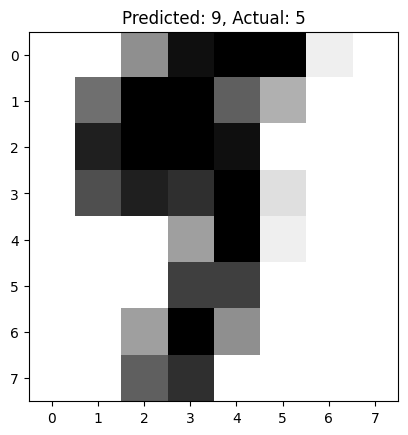

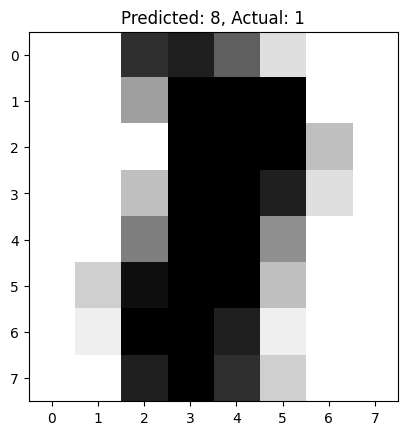

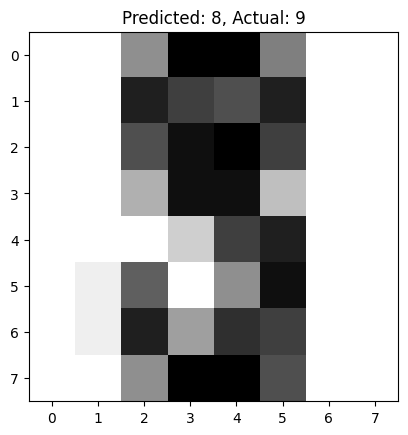

In [215]:
for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] != y_test[i]:
        image = X_test[i] # 2 sem dej načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")
        plt.show()
        
